In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Group 1: High achievers
math_scores_1 = np.random.normal(loc=80, scale=5, size=30)
english_scores_1 = np.random.normal(loc=85, scale=5, size=30)

# loc--->mean distribution
# scale->standard deviation
# size-->size

In [3]:
# Group 2: Medium achievers
math_scores_2 = np.random.normal(loc=60, scale=8, size=50)
english_scores_2 = np.random.normal(loc=70, scale=7, size=50)

In [4]:
# Group 3: Low achievers
math_scores_3 = np.random.normal(loc=40, scale=4, size=20)
english_scores_3 = np.random.normal(loc=45, scale=5, size=20)

In [5]:
# Combine the data
math_scores = np.concatenate([math_scores_1, math_scores_2, math_scores_3])
english_scores = np.concatenate([english_scores_1, english_scores_2, english_scores_3])
data = np.column_stack((math_scores, english_scores))

In [6]:
# Perform k-means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

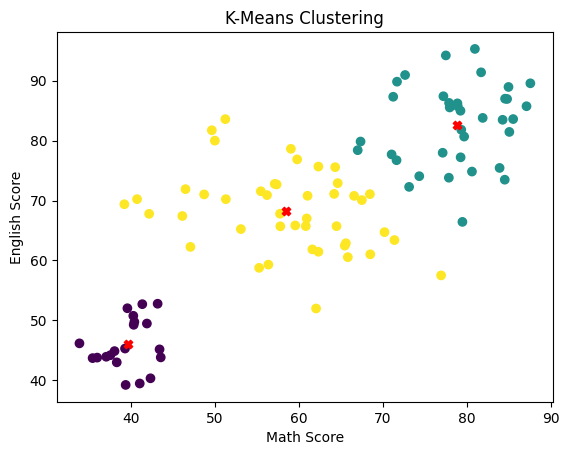

In [8]:
# Plot the data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')
plt.title('K-Means Clustering')
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.show()

In [9]:
# New student's marks
new_student_marks = [70, 75]

In [10]:
# Predict the cluster for the new student
new_student_cluster = kmeans.predict([new_student_marks])

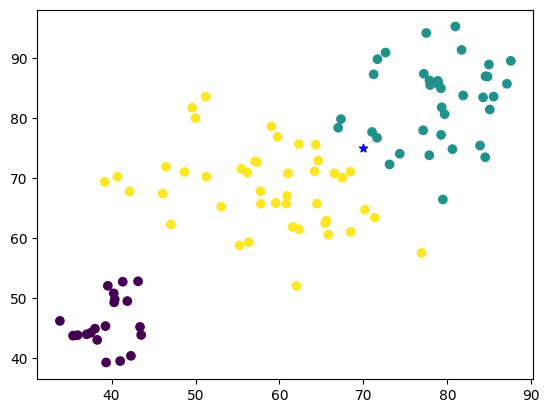

In [12]:
# Plot the data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')
plt.scatter(new_student_marks[0], new_student_marks[1], marker='*', color='blue', label='New Student')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def kmeans(X, k, max_iterations=100):
    # Randomly initialize the centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = assign_labels(X, centroids)

        # Update the centroids based on the mean of the assigned points
        new_centroids = update_centroids(X, labels, k)

        # Check if the centroids have converged
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [ ]:
def assign_labels(X, centroids):
    # Calculate the Euclidean distance between each data point and centroids
    distances = np.sqrt(((X[:, np.newaxis] - centroids)**2).sum(axis=2))

    # Assign each data point to the nearest centroid
    labels = np.argmin(distances, axis=1)

    return labels

In [ ]:
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))

    for i in range(k):
        # Calculate the mean of the data points assigned to the current centroid
        centroids[i] = np.mean(X[labels == i], axis=0)

    return centroids

In [ ]:
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-means Clustering')
    plt.show()  

In [ ]:
# Generate sample data
np.random.seed(0)
X = np.random.randn(200, 2) + np.array([[2, 2]])
X = np.concatenate([X, np.random.randn(200, 2)])

# Apply K-means clustering
k = 2
labels, centroids = kmeans(X, k)

# Visualize the clusters
plot_clusters(X, labels, centroids)